# Quantum Simulator

[![Download Notebook](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_notebook_en.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/mindquantum/en/beginner/mindspore_quantum_simulator.ipynb)&emsp;
[![Download Code](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_download_code_en.svg)](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/notebook/master/mindquantum/en/beginner/mindspore_quantum_simulator.py)&emsp;
[![View Source On Gitee](https://mindspore-website.obs.cn-north-4.myhuaweicloud.com/website-images/master/resource/_static/logo_source_en.svg)](https://gitee.com/mindspore/docs/blob/master/docs/mindquantum/docs/source_en/beginner/quantum_simulator.ipynb)

## Summary

After building the quantum circuit, we need to specify a back end to run the quantum circuit. In MindSpore Quantum, we can use the quantum Simulator [Simulator](https://www.mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator) to simulate the quantum circuit. In this tutorial we declare a two-bit 'ProjectQ' simulator to introduce the key features of the simulator.

## Environment Preparation


Import the modules that this tutorial depends on.

In [1]:
import numpy as np                             # Import the numpy library and abbreviate to np
from mindquantum.simulator import Simulator    # Import the Simulator class from mindquantum. simulator
from mindquantum.core.gates import X, H, RY    # Import quantum gate H, X, RY

Description:

(1) Numpy is a powerful Python library used to perform calculations on multidimensional arrays. It supports a large number of dimensional arrays and matrix operations. It also provides a large number of mathematical function libraries for array operations.

(2) MindSpore Quantum is a quantum-classical hybrid computing framework that supports training and reasoning of various quantum neural networks;

(3) The quantum gate to be executed in the quantum circuit set up needs to be imported from mindquantum. core module;

In [2]:
sim = Simulator('mqvector', 2)  #Declare a two-bit mqvector simulator
sim                             #Display simulator status

mqvector simulator with 2 qubits (little endian), dtype: mindquantum.complex128.
Current quantum state:
1¦00⟩

In MindSpore Quantum, we can import the simulator in the `mindQuantum.simulator` module. The [Simulator](https://mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator) class takes three arguments:

- `backend` : name of the simulator used. Currently, MindSpore Quantum supports `mqvector`, `mqvector_gpu`, `mqmatrix` and [NoiseBackend](https://mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.NoiseBackend.html#mindquantum.simulator.NoiseBackend) as a backend for emulation.
- `n_qubits` : The number of bits used by the simulator, which is 2 here.
- `seed` : the random seed used by the simulator when running the randomness correlation algorithm. By default, the seed is a random number, which is not required.
- `dtype`: the data type that the simulator used. Since the quantum state is a complex number vector, we support [mindquantum.complex64](https://mindspore.cn/mindquantum/docs/en/master/mindquantum.dtype.html) and [mindquantum.complex128](https://mindspore.cn/mindquantum/docs/en/master/mindquantum.dtype.html) as data type. The default data type is [mindquantum.complex128](https://mindspore.cn/mindquantum/docs/en/master/mindquantum.dtype.html)

From the output of the simulator, we can see that this is a 2-bit simulator of `mqvector` and little Endian. Little Endian means that throughout the simulator, we put bits with small bits to the right of the quantum state vector. Next, the output also states what quantum state the simulator is currently in, and after the simulator is initialized, the current quantum state defaults to zero. Note that the quantum simulator always maintains an internal quantum state that changes when we apply a quantum gate or a quantum circuit to the simulator, but does not change when we simply want to obtain some information about the quantum state. There are two types of operations for the quantum simulator:

- Operations that change the quantum state, usually beginning with 'apply', mainly include the following
    - [apply_gate](https://www.mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.apply_gate) : applies a quantum gate to the simulator
    - [apply_circuit](https://www.mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.apply_circuit) : applies a quantum circuit to the simulator
    - [apply_hamiltonian](https://www.mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.apply_hamiltonian) : Apply a Hamiltonian to the simulator. Note that the quantum state of the simulator is no longer a true quantum state
    - [set_qs](https://www.mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.set_qs) : Sets the current quantum state of the simulator directly
    - [reset](https://www.mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.reset) : reset the state of the simulator to | 0 ⟩ state
- Operations that do not change the quantum state, usually beginning with `get`, mainly include the following
    - [get_qs](https://www.mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.get_qs) : gets the current quantum state of the simulator
    - [get_expectation](https://www.mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.get_expectation) : calculates the expected value of the simulator's current quantum state regarding an observed quantity
    - [get_expectation_with_grad](https://www.mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.get_expectation_with_grad) : similar to the previous interface, except that this method also calculates the expected value gradient with respect to parameterized quantum lines
    - [sampling](https://www.mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.sampling) : in the current quantum state, sampling of the given quantum circuit

Let's learn the basic operation of the simulator briefly.

## Interacts with Quantum Gates and Quantum Circuits

In [3]:
sim = Simulator('mqvector', 2)    #Declare a 2-bit mqvector emulator
sim.apply_gate(H.on(0))           #Apply a Hadamard gate to qubit 0
sim                               #Output quantum simulator information

mqvector simulator with 2 qubits (little endian), dtype: mindquantum.complex128.
Current quantum state:
√2/2¦00⟩
√2/2¦01⟩

Above, we acted a [Hadamard](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.HGate.html) gate on the initial state of the [quantum simulator](https://www.mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html) and output the quantum state after evolution. Next we generate a parameterized quantum circuit and apply it to the current quantum state.

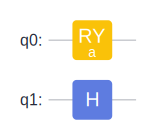

In [4]:
from mindquantum.core.circuit import Circuit   # Import Circuit module to build quantum Circuit

circ = Circuit()                       # Declare an empty quantum circuit
circ += H.on(1)                        # Add a Hadamard gate to it and apply it to qubit 1
circ += RY('a').on(0)                  # Add a parameterized RY gate to it and apply it to qubit 0
circ.svg()                             # Draws a quantum circuit picture in SVG format

In [5]:
#Apply a quantum circuit. When the circuit is a parameterized quantum circuit, we also need to provide parameter values.
sim.apply_circuit(circ, pr={'a': 1.234})
sim

mqvector simulator with 2 qubits (little endian), dtype: mindquantum.complex128.
Current quantum state:
0.11851349145283663¦00⟩
0.6971044056263442¦01⟩
0.11851349145283663¦10⟩
0.6971044056263442¦11⟩

In the above code, we create a parameterized quantum circuit `'circ'`, which we then apply to the quantum simulator and set parameter `'A'` to `'1.234'` by passing in a dictionary. Finally, the quantum state evolved from the [quantum simulator](https://www.mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html) is output.

## Setting and Gettig the Simulator State

We use [get_qs(ket=False)](https://www.mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.get_qs) to check the state of the current simulator,
The ket argument is a bool that determines whether the state of the current simulator is returned as a ket, `numpy.ndarray` when `ket=False`, or ket string when `ket=True`. The default `ket = False`.

In [6]:
print(sim.get_qs())  #View the simulator status and return the result in numpy.ndarray form

[0.11851349+0.j 0.69710441+0.j 0.11851349+0.j 0.69710441+0.j]


In [7]:
print(sim.get_qs(True))  #View the simulator status and return the result in ket form

0.11851349145283663¦00⟩
0.6971044056263442¦01⟩
0.11851349145283663¦10⟩
0.6971044056263442¦11⟩


During actual code writing, we often need to specify an initial state for the simulator to start evolving, which can be done using [set_qs()](https://www.mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.set_qs).

For example, we want the emulator state to be

$$
\frac{\sqrt{3}}{3}|00⟩+\frac{\sqrt{6}}{3}|11⟩
$$

Step 1: We calculate the vector form of the target state:

$$
\frac{\sqrt{3}}{3}|00⟩+\frac{\sqrt{6}}{3}|11⟩ =\frac{\sqrt{3}}{3}\times
\left(
\begin{array}{l}
1\\
0
\end{array}
\right)
\otimes
\left(
\begin{array}{l}
1\\
0
\end{array}
\right)+
\frac{\sqrt{6}}{3}\times
\left(
\begin{array}{l}
0\\
1
\end{array}
\right)\otimes
\left(
\begin{array}{l}
0\\
1
\end{array}
\right)= \frac{\sqrt{3}}{3}\times
\left(
\begin{array}{l}
1\\
0\\
0\\
0
\end{array}
\right)+
\frac{\sqrt{6}}{3}\times
\left(
\begin{array}{l}
0\\
0\\
0\\
1
\end{array}
\right)=
\left(
\begin{array}{l}
\frac{\sqrt{3}}{3}\\
0\\
0\\
\frac{\sqrt{6}}{3}
\end{array}
\right)
$$

Step 2: We assign this vector to the simulator using [set_qs()](https://www.mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.set_qs) as its state:

In [8]:
sim.set_qs(np.array([3**0.5, 0, 0, 6**0.5]))  #Set simulator state without normalization
print(sim.get_qs(True))                       #View simulator Status

0.5773502691896258¦00⟩
0.816496580927726¦11⟩


Viewing the simulator status through [get_qs()](https://www.mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.get_qs) can find that the current simulator status is we want to set the $\frac{\sqrt{3}}{3}|00⟩+\frac{\sqrt{6}}{3}|11⟩$.

In the actual programming process, we often need to simulate the circuit for several times, which will lead to a very large memory consumption by opening the simulator more than once. We can reuse the simulator by resetting the existing simulator, thus reducing the memory consumption.

We use [reset()](https://www.mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.reset) to reset the simulator:

In [9]:
sim.reset()          #Reset simulator
print(sim.get_qs())  #View simulator Status

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]


It can be found that the current simulator is reset to the initial $1|00⟩$ state.

Therefore, we can set up a corresponding quantum simulator and run a custom quantum circuit according to the quantum initial state we need. Let's run your first quantum circuit!

## [Quantum circuit sampling](https://www.mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.sampling)

Circuit sampling refers to performing multiple simulation measurements on quantum circuits, and statistically measuring the frequency of occurrence of various results. **Sampling does not change the state in the quantum circuit**.

[sampling(circuit, pr=None, shots=1, seed=None)](https://www.mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.Simulator.html#mindquantum.simulator.Simulator.sampling) is the sampling method provided in `MindSpore Quantum`, which accepts four parameters:

- `circuit (Circuit)`: [Quantum circuit](https://www.mindspore.cn/mindquantum/docs/en/master/core/circuit/mindquantum.core.circuit.Circuit.html) for which sampling is desired, note that at least one measurement operation (i.e. sampling point) must be included in the circuit.
- `pr (Union[None, dict, ParameterResolver])`: [parameter resolver](https://www.mindspore.cn/mindquantum/docs/en/master/core/parameterresolver/mindquantum.core.parameterresolver.ParameterResolver.html), When `circuit` is a parameterized circuit, the value of the parameter needs to be given.
- `shots (int)`: The number of times to sample, default 1.
- `seed`: The random seed for sampling, which is a random number by default and can be omitted.

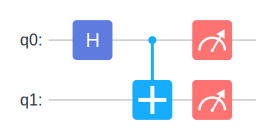

In [10]:
# Non-parameterized circuit sampling:
from mindquantum.core.gates import Measure  # Introduce measurement gate

circ = Circuit()                 # Initialize the quantum circuit
circ += H.on(0)                  # The H gate acts on qubit 0
circ += X.on(1, 0)               # The X gate acts on qubit 1 and is controlled by qubit 0
circ += Measure('q0').on(0)      # Apply a measurement on qubit 0 and name this measurement 'q0'
circ += Measure('q1').on(1)      # Apply a measurement to qubit 1 and name this measurement 'q1'
circ.svg()                       # Draw a quantum circuit picture in SVG format

In [11]:
sim.reset()
result = sim.sampling(circ, shots=1000)  # Sample the circuit defined above 1000 times
result

shots: 1000
Keys: q1 q0│0.00    0.13       0.259       0.389       0.519       0.649
───────────┼───────────┴───────────┴───────────┴───────────┴───────────┴
         00│▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓
           │
         11│▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒▒
           │
{'00': 519, '11': 481}

MindSpore Quantum also provides the function of drawing SVG diagrams from sampling results:

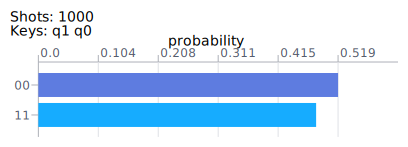

In [12]:
result.svg()  # Print out measurement results in SVG format

We can see that in sampling 1000 times, '00' appears 519 times and '11' appears 481 times (This many change during your run). The circuit we built actually produces a Bell state $\frac{\sqrt{2}}{2}|00⟩+\frac{\sqrt{2}}{2}|11⟩$. Intuitively, we can see that the probability of measuring the state to get '00' is $\frac{1}{2}$, the probability of getting '11' is $\frac{1}{2}$, the sampling result consistent with probability, slight errors are caused by simulator noise.

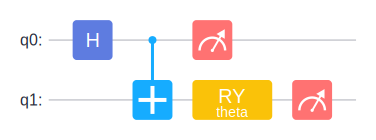

In [13]:
# Parameterized circuit sampling:
para_circ = Circuit()             # Initialize the quantum circuit
para_circ += H.on(0)              # The H gate acts on qubit 0
para_circ += X.on(1, 0)           # The X gate acts on qubit 1 and is controlled by qubit 0
para_circ += RY('theta').on(1)    # The RY(theta) gate acts on the qubit 1
para_circ += Measure('q0').on(0)   # Apply a measurement on qubit 0 and name this measurement 'q0'
para_circ += Measure('q1').on(1)  # Apply a measurement to qubit 1 and name this measurement 'q1'
para_circ.svg()                   # Draw a quantum circuit picture in SVG format

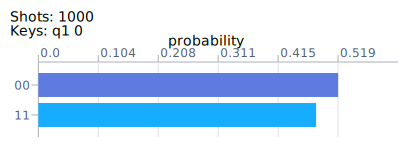

In [14]:
sim.reset()

# Assign the circuit parameter 'theta' defined above to 0 and sample 1000 times
result = sim.sampling(para_circ, {'theta': 0}, shots=1000)
result.svg()

We can see that '00' appears 519 times and '11' appears 481 times in the sampling result (This may change during your run). In fact, the [RY](https://www.mindspore.cn/mindquantum/docs/en/master/core/gates/mindquantum.core.gates.RY.html) gate parameter is assigned to 0, which is the I gate and equivalent to not doing any operation on the circuit. Therefore, the sampling circuit is essentially the same as the above Non-parameterized circuit. It can be observed that the results of two times sampling are almost the same, as expected.

## Supported Simulator

The simulator that supported by MindSpore Quantum is shown as below:

|Name|Feature|GPU supported|single precision|double precision|
|--|--|--|--|--|
|`mqvector`|Full amplitude simulator|❌|✅|✅|
|`mqvector_gpu`|GPU version full amplitude simulator|✅|✅|✅|
|`mqmatrix`|Density matrix simulator|❌|✅|✅|
|[NoiseBackend](https://mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.NoiseBackend.html#mindquantum.simulator.NoiseBackend)|Simulate noise system: [Noise Simulator](https://mindspore.cn/mindquantum/docs/en/master/middle_level/noise_simulator.html)|✅|✅|✅|

> Please note that the `mqvector_gpu` backend only supports running in environments with CUDA version 11 or above.

## How to Choose Simulator

We know that the dimension of quantum states increases exponentially as the number of bits increases, so the physical memory required to simulate large-bit quantum systems will increase dramatically. Below, we give the memory space required to store a full-amplitude quantum state at different bits:

|Qubit number|mindquantum.complex128|mindquantum.complex64|
|--|--|--|
|6|1kB|0.5kB|
|16|1MB|0.5MB|
|26|1GB|0.5GB|
|30|16GB|8GB|
|36|1TB|0.5TB|
|40|16TB|8TB|
|46|1PB|0.5PB|

It can be seen that when simulating large-bit systems, we can consider using single-precision types to reduce the memory usage. In MindSpore Quantum, we can easily modify the data type of the simulator by `dtype`:

In [15]:
import mindquantum as mq
from mindquantum.simulator import Simulator

sim = Simulator('mqvector', 2, dtype=mq.complex64)
print(sim)

mqvector simulator with 2 qubits (little endian), dtype: mindquantum.complex64.
Current quantum state:
1¦00⟩


Below we give some rules of thumb to help you choose different simulators reasonably:

- Qubit number less than 8 bits: `mqvector`. In small bits, the CPU will run faster than the GPU.
- Qubit number larger than 8 bits: `mqvector_gpu`. At large bits, the GPU will take advantage of its parallel computing.
- Simulating mixed state: `mqmatrix`. `mqmatrix` is a density matrix simulator and therefore supports the simulation of mixed state.
- Simulating noise system: [NoiseBackend](https://mindspore.cn/mindquantum/docs/en/master/simulator/mindquantum.simulator.NoiseBackend.html#mindquantum.simulator.NoiseBackend). You can easily add quantum channel into circuit by this simulator, so that you can simulate a noisy quantum system.
- Quantum chemistry simulation: `mindquantum.complex128`. This task always need to simulate the ground state to chemical accuracy, so we suggest double precision.
- Quantum machine learning: `mindquantum.complex64`. Machine learning task is always not sensitive to data precision, so we suggest single precision.

If you want to learn more about how to measure quantum circuits and understand the theoretical explanation of the distribution of sampling results, please click: [Quantum Measurement Tutorial](https://mindspore.cn/mindquantum/docs/en/master/beginner/quantum_measurement.html).

In [16]:
from mindquantum.utils.show_info import InfoTable

InfoTable('mindquantum', 'scipy', 'numpy')

Software,Version
mindquantum,0.9.11
scipy,1.10.1
numpy,1.24.4
System,Info
Python,3.8.17
OS,Linux x86_64
Memory,16.62 GB
CPU Max Thread,16
Date,Tue Jan 2 16:43:09 2024
